In [1]:
!pip install missingno


In [0]:
import missingno as ms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

# Obtain Data Get Data from Google Drive 

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1uEPYpbPOXGfWpSYWydx1v_JeTcifhG0m'}) # replace the id with id of file you want to access
downloaded.GetContentFile('training.csv')  

#3. Read file as panda dataframe
import pandas as pd
train = pd.read_csv('training.csv')

In [0]:
#2. Get the file
downloaded = drive.CreateFile({'id':'1CLGToItOq9HwbDKh9cW1z0D2ouqbN7RV'}) # replace the id with id of file you want to access
downloaded.GetContentFile('test.csv')  

#3. Read file as panda dataframe
import pandas as pd
test = pd.read_csv('test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

# Analyse the Data 

In [6]:
train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [0]:
train.fillna(train['left_eye_inner_corner_x'].median(),inplace = True)
#train.fillna(train['C2'].median(),inplace = True)

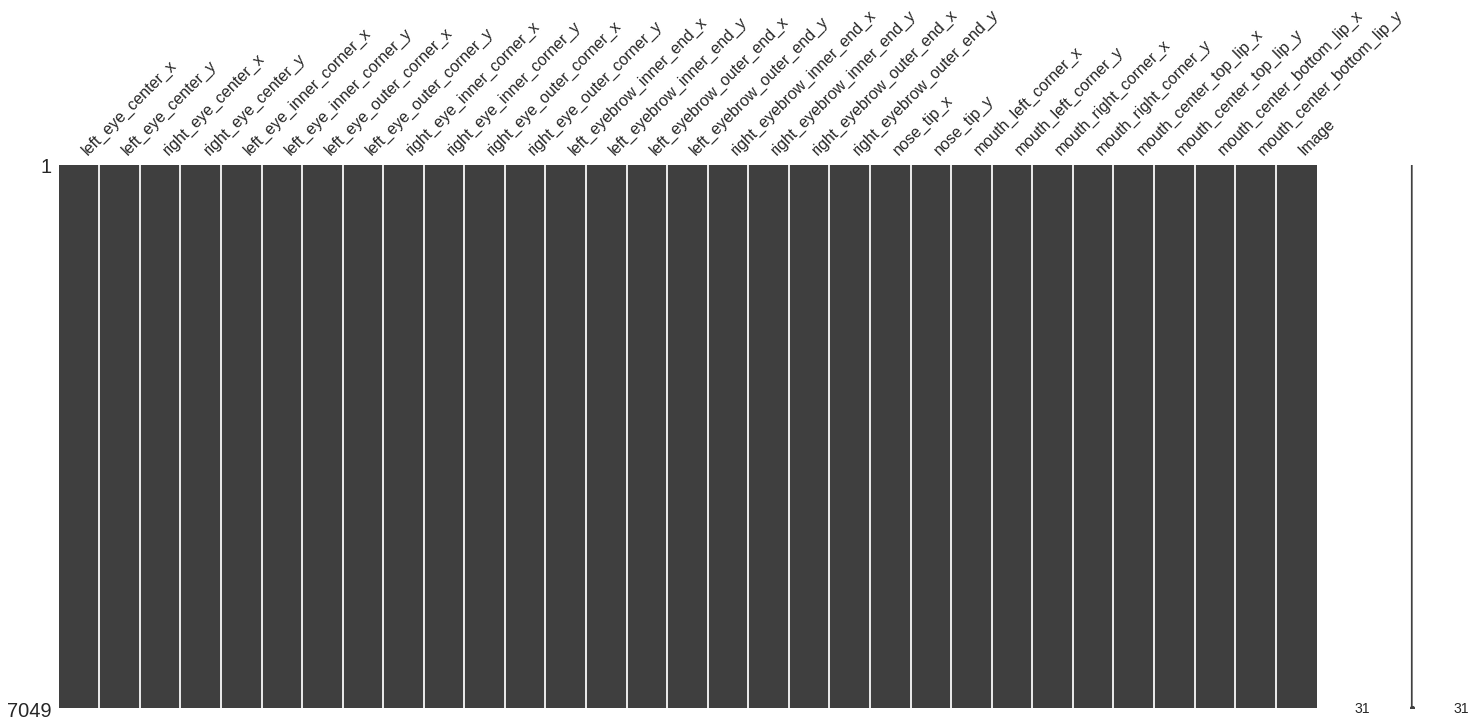

In [8]:
ms.matrix(train)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7049 non-null float64
left_eye_center_y            7049 non-null float64
right_eye_center_x           7049 non-null float64
right_eye_center_y           7049 non-null float64
left_eye_inner_corner_x      7049 non-null float64
left_eye_inner_corner_y      7049 non-null float64
left_eye_outer_corner_x      7049 non-null float64
left_eye_outer_corner_y      7049 non-null float64
right_eye_inner_corner_x     7049 non-null float64
right_eye_inner_corner_y     7049 non-null float64
right_eye_outer_corner_x     7049 non-null float64
right_eye_outer_corner_y     7049 non-null float64
left_eyebrow_inner_end_x     7049 non-null float64
left_eyebrow_inner_end_y     7049 non-null float64
left_eyebrow_outer_end_x     7049 non-null float64
left_eyebrow_outer_end_y     7049 non-null float64
right_eyebrow_inner_end_x    7049 non-null float64
right_eyebrow_inner_end_y 

In [10]:
train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,...,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000
mean,66.349014,37.681953,30.359582,38.016276,59.257811,52.423037,63.815416,52.358697,52.016382,52.446654,...,48.374186,62.715884,60.586097,64.669260,50.801628,64.738946,55.648219,63.698676,48.619729,78.878082
std,3.456002,3.254404,3.322194,3.165966,1.528334,10.067883,6.830527,10.220238,10.666180,10.043760,...,4.280038,5.720567,2.968883,8.208906,12.541753,8.274374,5.623316,7.022986,4.322529,5.559688
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.073920,35.906648,28.788000,36.329459,59.304615,39.393636,59.304615,39.625091,37.930983,39.395455,...,46.602370,59.292697,59.304615,59.304615,35.400471,59.304615,49.497220,59.304615,46.584000,75.493651
50%,66.492983,37.531396,30.260706,37.818074,59.304615,59.304615,59.304615,59.304615,59.304615,59.304615,...,48.424713,63.451421,59.304615,59.304615,59.304615,59.304615,59.304615,59.304615,48.610909,78.667371
75%,68.024349,39.270711,31.776539,39.576677,59.304615,59.304615,71.477333,59.304615,59.304615,59.304615,...,50.330437,66.492686,60.948571,72.471000,59.304615,72.915321,59.304615,68.928000,50.724399,82.222604
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [11]:
train.isnull().any().value_counts()

False    31
dtype: int64

Split 

In [0]:
image = []
for i in range(0,7049):
  img = train['Image'][i].split(' ')
  img = ['0' if x == '' else x for x in img]
  image.append(img)

In [0]:
image_list = np.array(image,dtype = 'float')
X_train = image_list.reshape(-1,96,96)

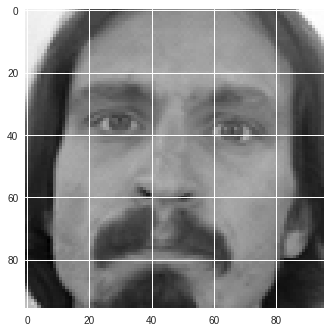

In [14]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [0]:
training = train.drop('Image',axis =1)

y_train = []
for i in range(0,7049):
  y = training.iloc[i,:]
  
  y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

In [20]:
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96,96)),
                        Dense(128, activation= 'relu'),
                        Dropout(0,1),
                        Dense(64, activation='relu'),
                        Dense(30)
                        ])
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mae','accuracy'])

Using TensorFlow backend.


In [21]:
model.fit(X_train,y_train,epochs = 500,batch_size = 128,validation_split = 0.2)

Train on 5639 samples, validate on 1410 samples
Epoch 1/500
5639/5639 [==============================] - 2s 420us/step - loss: 14591.7459 - mean_absolute_error: 65.4437 - acc: 0.0472 - val_loss: 1536.2396 - val_mean_absolute_error: 33.9792 - val_acc: 0.0021
Epoch 2/500
5639/5639 [==============================] - 2s 296us/step - loss: 1100.4622 - mean_absolute_error: 27.4337 - acc: 5.3201e-04 - val_loss: 787.0481 - val_mean_absolute_error: 23.6821 - val_acc: 0.0000e+00
Epoch 3/500
5639/5639 [==============================] - 2s 293us/step - loss: 531.1565 - mean_absolute_error: 18.4086 - acc: 8.8668e-04 - val_loss: 327.2179 - val_mean_absolute_error: 14.2920 - val_acc: 0.0000e+00
Epoch 4/500
5639/5639 [==============================] - 2s 297us/step - loss: 292.6634 - mean_absolute_error: 13.4644 - acc: 0.0129 - val_loss: 207.8039 - val_mean_absolute_error: 11.3937 - val_acc: 0.2128
Epoch 5/500
5639/5639 [==============================] - 2s 294us/step - loss: 230.8507 - mean_absolute_

In [0]:
timag = []
for i in range(0,1783):
  timg = test['Image'][i].split(' ')
  timg = ['0' if x == '' else x for x in timg]
  
  timag.append(timg)

In [0]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96)

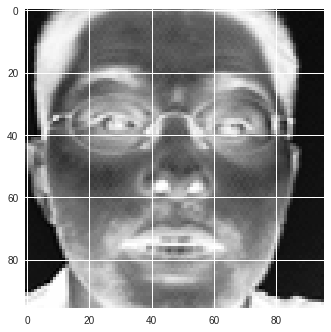

In [28]:
plt.imshow(X_test[0])
plt.show()

In [0]:
pred = model.predict(X_test)

In [0]:
#2. Get the file
downloaded = drive.CreateFile({'id':'1e56Jl4qtZtg_8KoCY_wRRMtVxVM4u_Vc'}) # replace the id with id of file you want to access
downloaded.GetContentFile('IdLookupTable.csv')  

#3. Read file as panda dataframe
import pandas as pd
ID = pd.read_csv('IdLookupTable.csv')

In [0]:
lookid_list = list(ID['FeatureName'])
imageID = list(ID['ImageId']-1)
pre_list = list(pred)

In [0]:
rowid = ID['RowId']
rowid=list(rowid)

In [0]:
feature = []
for f in list(ID['FeatureName']):
  feature.append(lookid_list.index(f))

In [0]:
preded = []
for x,y in zip(imageID,feature):
  preded.append(pre_list[x][y])

In [0]:
rowid = pd.Series(rowid,name = 'RowId')

In [0]:
loc = pd.Series(preded,name = 'Location')

In [0]:
submission = pd.concat([rowid,loc],axis = 1)

In [0]:
submission.to_csv('face_key_detection_submission.csv',index = False)

In [0]:
from google.colab import files
files.download('face_key_detection_submission.csv') 

# Import Essential Libraries